In [1]:
from functions_files import compact_keras

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)


In [2]:
import numpy as np

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import datasets

import pickle

In [3]:
from scipy.sparse import *
from keras.utils import np_utils

iris = datasets.load_iris()
data = iris.data # iris data
trgt = iris.target # iris data
iris_colors = ['b','r','g']
iris_labels = ['Setosa','Versicolor','Virginica']

# for classification -> target max sparse
trgt_sparse = np_utils.to_categorical(trgt)


In [8]:
data.shape

(150, 4)

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import *
import keras.callbacks as callbacks


class Compact_Keras(object):
    '''
    version -- v0.0
    Compact Keras is a class that you can create Keras models faster and more easy with less code lines.
    
    Arguments:
    
    input_size -- the size of data (features) that will be use for contruct the neural network model.
    
    Keyword arguments:
    
    hidden_layers -- number of hidden layer to be used in your model (default is 1).
    numbers_of_neurons -- numbers of neurons to be used to construct the model (default is 5).
    epoch_numbers -- number of training epochs (default is 50).
    batch_size -- number of events to be use in echa epoch (mini-batch) (default is 5).
    callbacks -- callbacks to use in traning see https://keras.io/callbacks/ (default is None).
    number_neurons_output_layer -- number of neurons to be use in output layer
    loss_function -- function to be minimized in training (default is Binary Crossentropy).
    optimizer -- optimizer to be used in traning (default is Adam).
    output_layer_activation -- the function to be use in the output layer (default is hiperbolic tangent[tanh])
    
    
    *~ it's possible use other Keras optimezers and Keras loss_functions more information on:
        https://keras.io/optimizers/
        https://keras.io/losses/  ~*

    
                        Compact Keras - Compact for those tho see giant for those who uses:
    *=============================================================================================================*
    ||                                   Classification Exemple:                                                 ||
    || Create a sintetic input and sintetic target                                                               ||
    || >>> A = np.vstack((np.ones((100,2)),-1*np.ones((100,2)))                                                  ||
    || >>> sintetic_target = np.hstack((np.ones((100)),-1*np.ones((100)))                                        ||
    || >>> sparse_trgt = np_utils.to_categorical(sintetic_target) # make targets maximally sparse                ||     
    || Create the Compact Keras objet                                                                            ||
    || >>> compact_keras = Compact_Keras(A.shape[1])                                                             ||
    || >>> train_model = compact_keras.train(A[:150,:],sparse_trgt[:150,:],                                      ||
    ||                                       validation_data=(A[150:,:],sparse_trgt[150:,:]))                    ||
    ||                                                                                                           ||
    ||                                                                                                           ||
    *=============================================================================================================*
    
    '''
    
    def __init__(self, input_size, n_hidden_layers=1, number_of_neurons=5, number_neurons_output_layer=2,
                 epoch_numbers=100, batch_size=5, callbacks=None,
                 loss_function='binary_crossentropy',optimizer='adam',output_layer_activation='tanh'):
        
        
        self.n_hidden_layers = n_hidden_layers
        self.number_of_neurons = number_of_neurons
        self.epoch_numbers = epoch_numbers
        self.batch_size = batch_size
        self.callbacks = callbacks
        self.number_neurons_output_layer = number_neurons_output_layer
        self.loss_function = loss_function
        self.optimizer = optimizer
        self.output_layer_activation = output_layer_activation
        
        # the constructor create and compile a keras model
        model = Sequential()
        model.add(Dense(input_size,
                        kernel_initializer='identity',
                        trainable=False,
                        input_dim=input_size))
        model.add(Activation('linear'))
        
        for ilayer in range(self.n_hidden_layers):
            model.add(Dense(self.number_of_neurons, kernel_initializer='uniform',
                            input_dim=input_size))
            model.add(Activation('tanh'))
            if ilayer != 0:
                model.add(Dense(self.number_of_neurons, kernel_initializer='uniform',
                                input_dim=self.number_of_neurons))
                model.add(Activation('tanh'))
            
        model.add(Dense(self.number_neurons_output_layer,kernel_initializer='uniform'))
        model.add(Activation(self.output_layer_activation)) 
        model.compile(loss=self.loss_function, optimizer=self.optimizer,
                      metrics=['accuracy'])
        self.model = model
    
    def train(self,input_data,data_target,validation_data,verbose=0,shuffle=True):
    
        self.verbose = verbose
        self.shuffle = shuffle
        
        trn_desc = self.model.fit(input_data, data_target, 
                             epochs=self.epoch_numbers, 
                             batch_size=self.batch_size,
                             callbacks=self.callbacks, 
                             verbose=verbose,
                             validation_data=validation_data,
                             shuffle=shuffle)
        
        return trn_desc
        

In [5]:
compact_keras = compact_keras.Compact_Keras(data.shape[1],number_neurons_output_layer=3)

In [6]:
CVO = model_selection.StratifiedKFold(2)

train_id, test_id = CVO.split(data, trgt)


train_id, test_id = train_id[0], test_id[0]

scaler = preprocessing.StandardScaler().fit(data[train_id,:])
norm_data = scaler.transform(data)

train_model = compact_keras.train(norm_data[train_id,:],trgt_sparse[train_id,:],
                                  validation_data=(data[test_id,:],trgt_sparse[test_id,:]))



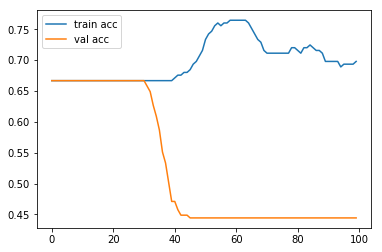

In [7]:
import matplotlib.pyplot as plt
plt.plot(train_model.history['acc'],label='train acc')
plt.plot(train_model.history['val_acc'],label='val acc')
plt.legend()
plt.show()

In [14]:
print(compact_keras.model.output_shape)

(None, 3)


In [17]:
compact_keras.model.predict(data)

array([[ 0.88545102, -0.1762545 , -0.03537255],
       [ 0.86880815, -0.12655708, -0.03499366],
       [ 0.87410903, -0.16323879, -0.03441182],
       [ 0.86166555, -0.09872435, -0.03450795],
       [ 0.88614905, -0.18124101, -0.03518445],
       [ 0.87907529, -0.0656296 , -0.03587392],
       [ 0.86721921, -0.10523479, -0.03439239],
       [ 0.87886155, -0.14309047, -0.03523181],
       [ 0.85346353, -0.09552447, -0.03397453],
       [ 0.87570143, -0.15926066, -0.03502997],
       [ 0.89136314, -0.17775318, -0.03600542],
       [ 0.87200165, -0.11199181, -0.03494859],
       [ 0.8741312 , -0.17125624, -0.03470421],
       [ 0.87335604, -0.22876443, -0.03299908],
       [ 0.9043203 , -0.25231683, -0.03704446],
       [ 0.89829355, -0.15854943, -0.03628599],
       [ 0.89001614, -0.15404411, -0.03576009],
       [ 0.87962353, -0.13306522, -0.03533102],
       [ 0.88766259, -0.11268307, -0.03635505],
       [ 0.88412523, -0.13648991, -0.03537473],
       [ 0.87966716, -0.11031552, -0.036